In [1]:
import numpy as np
from utils import processor

import matplotlib.pyplot as plt
from models.LR    import ProjectLinearRegressor
from models.MLPR  import ProjectMLPRegressor
from models.SVR   import ProjectSVRegressor
from models.RFR   import ProjectRFRegressor
from models.GBR   import ProjectGBRegressor

<h2 style="font-family: Arial;">Data processing instanciation</h2>

In [2]:
path = "./database/data.csv"
process = processor.DataProcessor(path_to_dataset=path)

<h2 style="font-family: Arial;">Dataset Reading</h2>

In [3]:
process.read_dataset()

<h2 style="font-family: Arial;">Data describing</h2>

In [4]:
process.describe_data()

,pIC50,num_atoms,logP
count,15037.000000,16087.000000,16087.000000
mean,0.998739,18.749984,2.256600
std,2.479588,8.428888,1.609861
min,0.000000,3.000000,-5.395600
25%,0.000000,13.000000,1.214900
50%,0.010000,17.000000,2.163200
75%,0.130000,23.000000,3.232440
max,10.970000,85.000000,15.879200


In [5]:
process.info_data()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16087 entries, 0 to 16086
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SMILES     16087 non-null  object 
 1   pIC50      15037 non-null  float64
 2   num_atoms  16087 non-null  int64  
 3   logP       16087 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 502.8+ KB


In [6]:
process.expand_df_columns()

In [7]:
process.df.shape

(16087, 129)

In [8]:
process.df.head()

,SMILES,pIC50,num_atoms,logP,H,He,Li,Be,B,C,...,Lv,Ts,Og,MolWt,NumHAcceptors,NumHDonors,TPSA,NumDoubleBonds,RingCount,NumRotatableBonds
0,O=S(=O)(Nc1cccc(-c2cnc3ccccc3n2)c1)c1cccs1,4.26,25,4.1591,13,0,0,0,0,18,...,0,0,0,367.455,5,1,71.95,2,4,4
1,O=c1cc(-c2nc(-c3ccc(-c4cn(CCP(=O)(O)O)nn4)cc3)...,4.34,36,3.6743,20,0,0,0,0,24,...,0,0,0,506.434,6,4,149.78,2,5,7
2,NC(=O)c1ccc2c(c1)nc(C1CCC(O)CC1)n2CCCO,4.53,23,1.5361,23,0,0,0,0,17,...,0,0,0,317.389,5,3,101.37,1,3,5
3,NCCCn1c(C2CCNCC2)nc2cc(C(N)=O)ccc21,4.56,22,0.9510,23,0,0,0,0,16,...,0,0,0,301.394,5,3,98.96,1,3,5
4,CNC(=S)Nc1cccc(-c2cnc3ccccc3n2)c1,4.59,21,3.2130,14,0,0,0,0,16,...,0,0,0,294.383,3,2,49.84,1,3,2


In [9]:
process.describe_data()

,pIC50,num_atoms,logP,H,He,Li,Be,B,C,N,...,Lv,Ts,Og,MolWt,NumHAcceptors,NumHDonors,TPSA,NumDoubleBonds,RingCount,NumRotatableBonds
count,15037.000000,16087.000000,16087.000000,16087.000000,16087.0,16087.0,16087.0,16087.000000,16087.000000,16087.000000,...,16087.0,16087.0,16087.0,16087.000000,16087.000000,16087.000000,16087.000000,16087.000000,16087.000000,16087.000000
mean,0.998739,18.749984,2.256600,15.644931,0.0,0.0,0.0,0.000062,13.245291,2.276497,...,0.0,0.0,0.0,273.937257,3.845963,1.233543,63.872325,1.428420,2.050973,3.633866
std,2.479588,8.428888,1.609861,9.054794,0.0,0.0,0.0,0.007884,6.440279,1.989875,...,0.0,0.0,0.0,119.565844,2.422930,1.210361,39.155225,1.266132,1.374856,3.005584
min,0.000000,3.000000,-5.395600,0.000000,0.0,0.0,0.0,0.000000,1.000000,0.000000,...,0.0,0.0,0.0,40.065000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,13.000000,1.214900,9.000000,0.0,0.0,0.0,0.000000,9.000000,1.000000,...,0.0,0.0,0.0,186.155000,2.000000,0.000000,35.530000,0.000000,1.000000,1.000000
50%,0.010000,17.000000,2.163200,14.000000,0.0,0.0,0.0,0.000000,12.000000,2.000000,...,0.0,0.0,0.0,255.217000,3.000000,1.000000,59.070000,1.000000,2.000000,3.000000
75%,0.130000,23.000000,3.232440,20.000000,0.0,0.0,0.0,0.000000,17.000000,3.000000,...,0.0,0.0,0.0,341.430500,5.000000,2.000000,88.690000,2.000000,3.000000,5.000000
max,10.970000,85.000000,15.879200,111.000000,0.0,0.0,0.0,1.000000,73.000000,11.000000,...,0.0,0.0,0.0,1202.635000,20.000000,10.000000,288.280000,12.000000,9.000000,32.000000


In [10]:
process.info_data()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16087 entries, 0 to 16086
Columns: 129 entries, SMILES to NumRotatableBonds
dtypes: float64(4), int64(124), object(1)
memory usage: 15.8+ MB


In [11]:
process.clean_data()

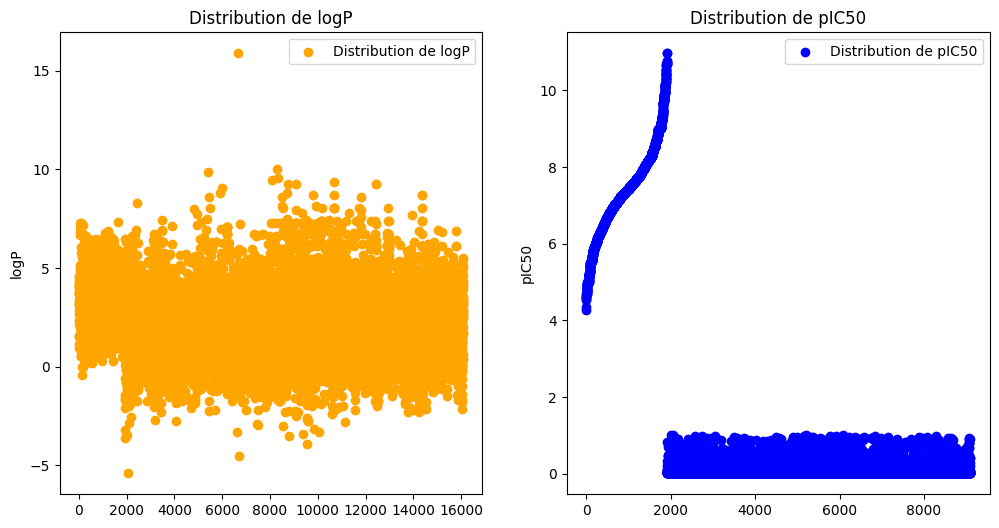

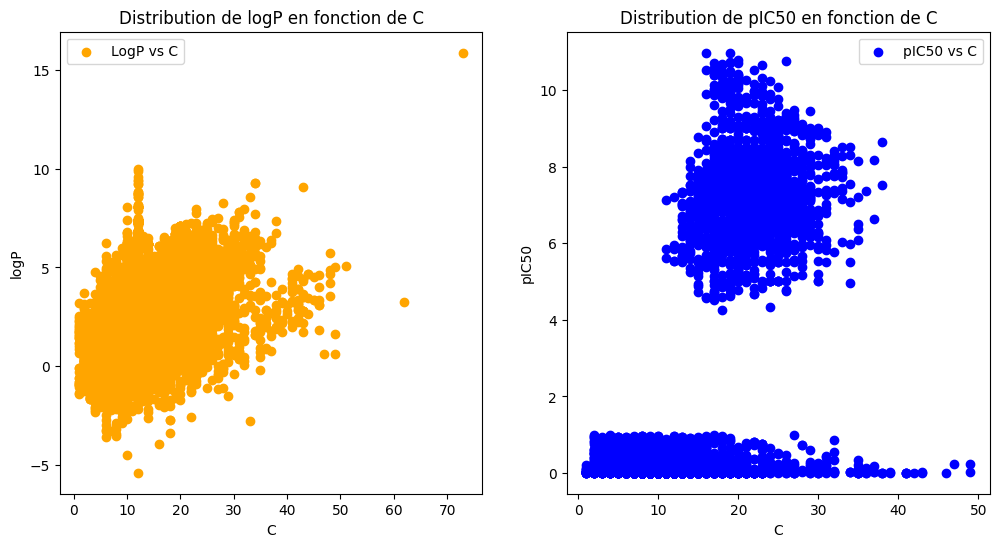

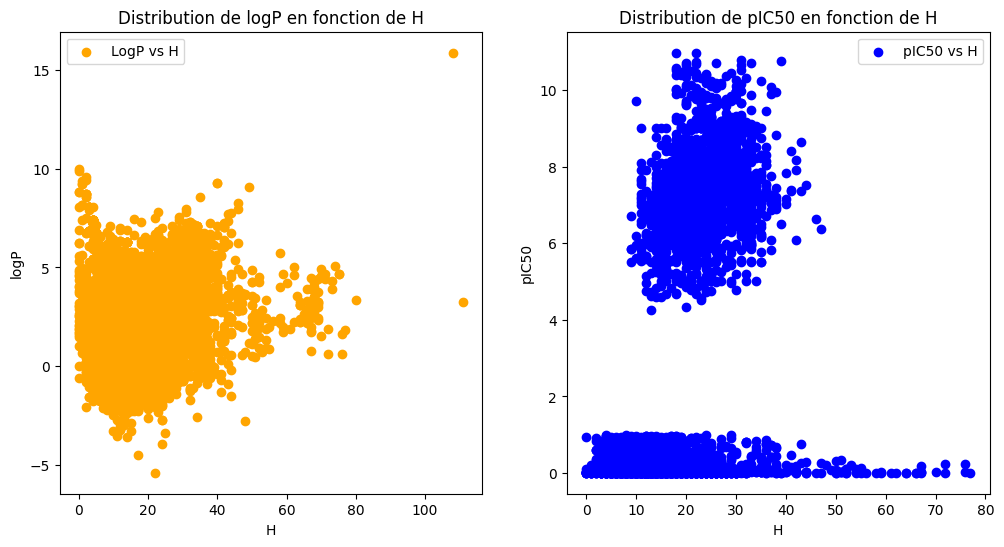

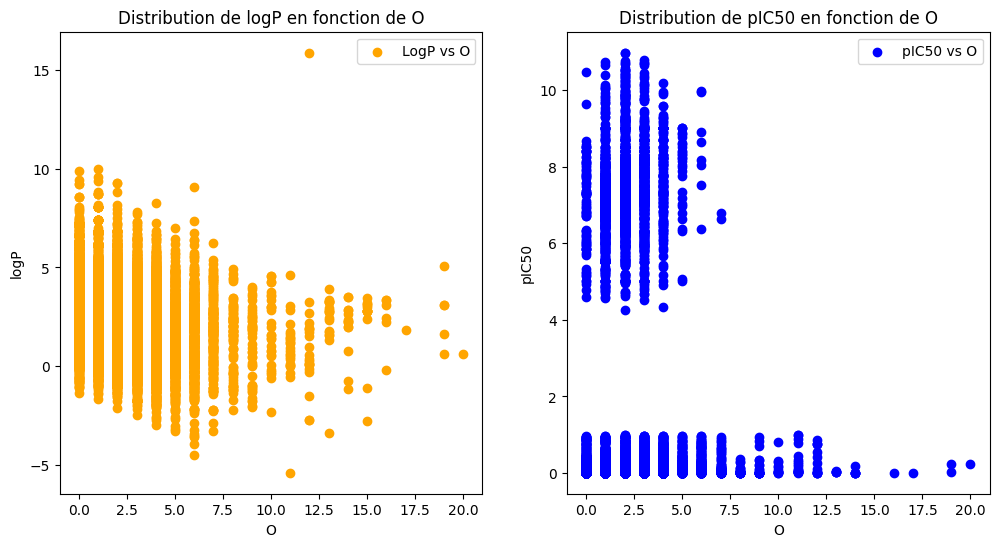

In [12]:
about = ['C', 'H', 'O']

process.visualize_data(about)

In [13]:
process.split_data()

In [14]:
process.validate_splitting()

Training set size for pIC50: 6447 samples
Validation set size for pIC50: 1326 samples
Test set size for pIC50: 1326 samples
Training set size for logP: 9652 samples
Validation set size for logP: 3217 samples
Test set size for logP: 3218 samples


In [15]:
process.standardize_data()

In [16]:
process.validate_scaling()

Means of scaled features for pIC50: [ 6.61277558e-18 -9.25788581e-17  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  3.08596194e-17  9.80895044e-17
  2.03893914e-17  7.99043716e-18  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -2.42468438e-17  1.54298097e-17
  3.30638779e-18  4.73915583e-17  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  9.91916337e-18 -3.85745242e-18
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  9.91916337e-18  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00

In [17]:
print(f"Missing pIC50 shape : {process.missing_df_pIC50.shape}")
process.missing_df_pIC50.head()

Missing pIC50 shape : (6988, 129)


,SMILES,pIC50,num_atoms,logP,H,He,Li,Be,B,C,...,Lv,Ts,Og,MolWt,NumHAcceptors,NumHDonors,TPSA,NumDoubleBonds,RingCount,NumRotatableBonds
1915,COC12C(COC(N)=O)C3=C(C(=O)C(C)=C(N)C3=O)N1CC1NC12,NaN,24,-1.6512,18,0,0,0,0,15,...,0,0,0,334.332,8,3,146.89,5,4,3
1919,CC(O)C(=O)O,NaN,6,-0.5482,6,0,0,0,0,3,...,0,0,0,90.078,2,2,57.53,1,0,1
1940,OCC(O)C(O)C(O)C(O)CO,NaN,12,-3.5854,14,0,0,0,0,6,...,0,0,0,182.172,6,6,121.38,0,0,5
1941,O=C1NC(=O)C(=O)C(=O)N1,NaN,10,-2.0785,2,0,0,0,0,4,...,0,0,0,142.070,4,2,92.34,4,1,0
1944,O=C1OC(C(O)CO)C(O)=C1O,NaN,12,-1.4074,8,0,0,0,0,6,...,0,0,0,176.124,6,4,107.22,2,1,2


----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

<h1 style="font-family: Arial; text-align: center;">STEP 2: TRAINING AND PREDICTIONS</h1>

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [18]:
# Stores logP and pIC50 predict values for all the models. This will use will visualisation
pred_values_logP = {'Linear Regression':None, 'MLPRegressor':None, 'SVR': None, 'Random Forest Regressor': None, 'Gradient Boosting Regressor':None}
pred_values_pIC50 = {'Linear Regression':None, 'MLPRegressor':None, 'SVR': None, 'Random Forest Regressor': None, 'Gradient Boosting Regressor':None}

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
<br/><br/>
<h1 style="font-family: Arial;">1 - LINEAR REGRESSION (Lasso / Ridge)</h1>

<h3 style="font-family: Arial;">Preparation of data for training, testing, validation and prediction</h3>

In [19]:
# at this step, the calling below generates rows that have missing target values. They will be used after training to predict the missing target values
process.prepare_missing_for_predict()

# logP training, testing and validation data
X_train_logP, X_test_logP, X_val_logP, y_train_logP, y_test_logP, y_val_logP = process.get_logP_splited_data_copy()
X_missing_logP = process.X_missing_logP

# pIC50 training, testing and validation data
X_train_pIC50, X_test_pIC50, X_val_pIC50, y_train_pIC50, y_test_pIC50, y_val_pIC50 = process.get_pIC50_splited_data_copy()
X_missing_pIC50 = process.X_missing_pIC50

<h2 style="font-family: Arial;">- logP</h2>
<h3 style="font-family: Arial;">Model instanciation and regularization parameters generation</h3>

In [20]:
linearRegression = ProjectLinearRegressor(X_train_logP, X_test_logP, X_val_logP, y_train_logP, y_test_logP, y_val_logP, reg_mod = "lasso")
linearRegression.find_optimal_reg_parameter()

     param  mean_test_score
3    1.000         2.574595
4   10.000         2.574595
5  100.000         2.574595
2    0.100         0.650840
1    0.010         0.422565
0    0.001         0.410573

The best regularization parameter is Lasso(alpha=0.001, max_iter=10000)


<h3 style="font-family: Arial;">Training</h3>

In [21]:
linearRegression.train()
linearRegression.show_MSE_R2(X_train_logP, y_train_logP)


> Launch : LinearRegression

No loss history to plot. Train the model first.
Train MSE: 0.41006479863294654, Train R2: 0.8389419081978897


<h3 style="font-family: Arial;">Testing</h3>

In [22]:
y_test_pred_logP = linearRegression.predict(X_test_logP)
pred_values_logP['Linear Regression'] = y_test_pred_logP
linearRegression.show_MSE_R2(X_test_logP, y_test_logP, type_='Test')
print(f"y_pred = {y_test_pred_logP}")
print(f"y_real = {y_test_logP.to_numpy()}")

Test MSE: 0.3826811428080005, Test R2: 0.8561847994401348
y_pred = [4.50390941 0.83517772 4.8992036  ... 1.87970286 1.55908519 7.101291  ]
y_real = [4.2719 0.4354 6.1615 ... 2.5072 1.9426 7.274 ]


<h3 style="font-family: Arial;">Missing logP tragets prédiction</h3>

In [23]:
linearRegression.predict(X_missing_logP)

It has no missing value to predict here. shape of X = (0, 0)


<h2 style="font-family: Arial;">- pIC50</h2>
<h3 style="font-family: Arial;">Model instanciation and regularization parameters generation</h3>

In [24]:
linearRegression = ProjectLinearRegressor(X_train_pIC50, X_test_pIC50, X_val_pIC50, y_train_pIC50, y_test_pIC50, y_val_pIC50, reg_mod = "lasso", reg_paremeters=[0.01, 0.1, 1, 10])
linearRegression.find_optimal_reg_parameter()

   param  mean_test_score
3  10.00         9.066056
2   1.00         4.611327
1   0.10         3.043766
0   0.01         2.838955

The best regularization parameter is Lasso(alpha=0.01, max_iter=10000)


<h3 style="font-family: Arial;">Training</h3>

In [25]:
linearRegression.train()
linearRegression.show_MSE_R2(X_train_pIC50, y_train_pIC50)


> Launch : LinearRegression

No loss history to plot. Train the model first.
Train MSE: 2.809035416628064, Train R2: 0.6879728982222354


<h3 style="font-family: Arial;">Testing</h3>

In [26]:
y_test_pred_pIC50 = linearRegression.predict(X_test_pIC50)
pred_values_pIC50['Linear Regression'] = y_test_pred_pIC50
linearRegression.show_MSE_R2(X_test_pIC50, y_test_pIC50, type_='Test')
print(f"y_pred = {y_test_pred_pIC50}")
print(f"y_real = {y_test_pIC50.to_numpy()}")

Test MSE: 2.8876438541371408, Test R2: 0.6867511590567121
y_pred = [-0.1152785  -1.46653582  2.71913313 ...  0.66114973  0.86720441
 -0.21165301]
y_real = [0.22 0.09 0.01 ... 0.01 0.27 0.27]


<h3 style="font-family: Arial;">Missing pIC50 tragets prédiction</h3>

In [27]:
linearRegression.predict(X_missing_pIC50)

array([ 1.19072039, -2.61198719, -3.92077336, ...,  1.55675435,
        1.195513  ,  4.48737301])

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
<br/><br/>
<h1 style="font-family: Arial;">2 - MLP REGRESSOR</h1>

<h3 style="font-family: Arial;">Preparation of data for training, testing, validation and prediction</h3>

In [28]:
# at this step, the calling below generates rows that have missing target values. They will be used after training to predict the missing target values
process.prepare_missing_for_predict()

# logP training, testing and validation data
X_train_logP, X_test_logP, X_val_logP, y_train_logP, y_test_logP, y_val_logP = process.get_logP_splited_data_copy()
X_missing_logP = process.X_missing_logP

# pIC50 training, testing and validation data
X_train_pIC50, X_test_pIC50, X_val_pIC50, y_train_pIC50, y_test_pIC50, y_val_pIC50 = process.get_pIC50_splited_data_copy()
X_missing_pIC50 = process.X_missing_pIC50

<h2 style="font-family: Arial;">- logP</h2>
<h3 style="font-family: Arial;">Model instanciation and regularization parameters generation</h3>

In [29]:
mlpRegressor = ProjectMLPRegressor(X_train_logP, X_test_logP, X_val_logP, y_train_logP, y_test_logP, y_val_logP, activation='relu', hidden_layers=(50, 10, 55), combine_train_and_val=True)

<h3 style="font-family: Arial;">Training</h3>


> Launch : MLP Regessor -> hidden-layer = (50, 10, 55)



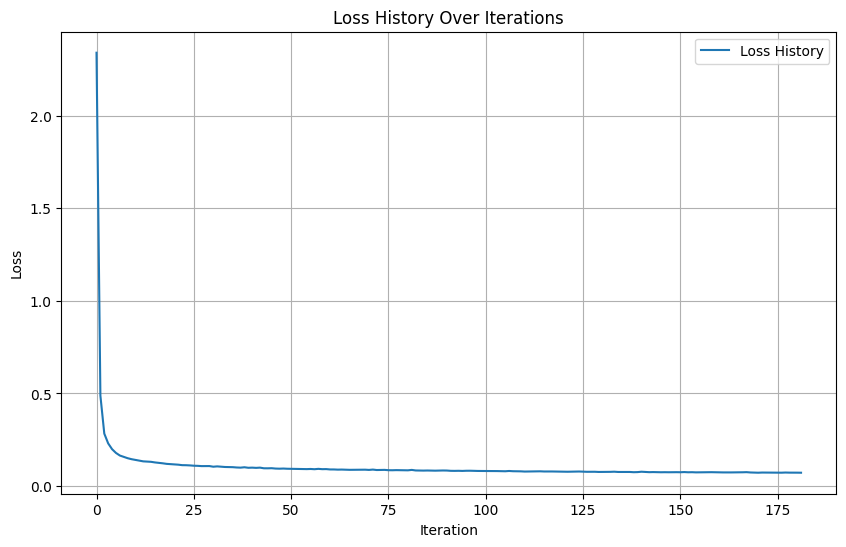

Train MSE: 0.13930174058765393, Train R2: 0.9452874945653589


In [30]:
mlpRegressor.train()
mlpRegressor.show_MSE_R2(X_train_logP, y_train_logP)

<h3 style="font-family: Arial;">Testing</h3>

In [31]:
y_test_pred_logP = mlpRegressor.predict(X_test_logP)
pred_values_logP['MLPRegressor'] = y_test_pred_logP
mlpRegressor.show_MSE_R2(X_test_logP, y_test_logP, type_='Test')
print(f"y_pred = {y_test_pred_logP}")
print(f"y_real = {y_test_logP.to_numpy()}")

Test MSE: 0.19383847238659424, Test R2: 0.927153664855437
y_pred = [4.02096655 1.19308959 6.18542727 ... 2.50205312 1.90177439 7.3232559 ]
y_real = [4.2719 0.4354 6.1615 ... 2.5072 1.9426 7.274 ]


<h3 style="font-family: Arial;">Missing logP tragets prédiction</h3>

In [32]:
mlpRegressor.predict(X_missing_logP)

It has no missing value to predict here. shape of X = (0, 0)


<h2 style="font-family: Arial;">- pIC50</h2>
<h3 style="font-family: Arial;">Model instanciation and regularization parameters generation</h3>

In [33]:
mlpRegressor = ProjectMLPRegressor(X_train_pIC50, X_test_pIC50, X_val_pIC50, y_train_pIC50, y_test_pIC50, y_val_pIC50, activation='relu', hidden_layers=(50, 10, 55), combine_train_and_val=True)

<h3 style="font-family: Arial;">Training</h3>


> Launch : MLP Regessor -> hidden-layer = (50, 10, 55)



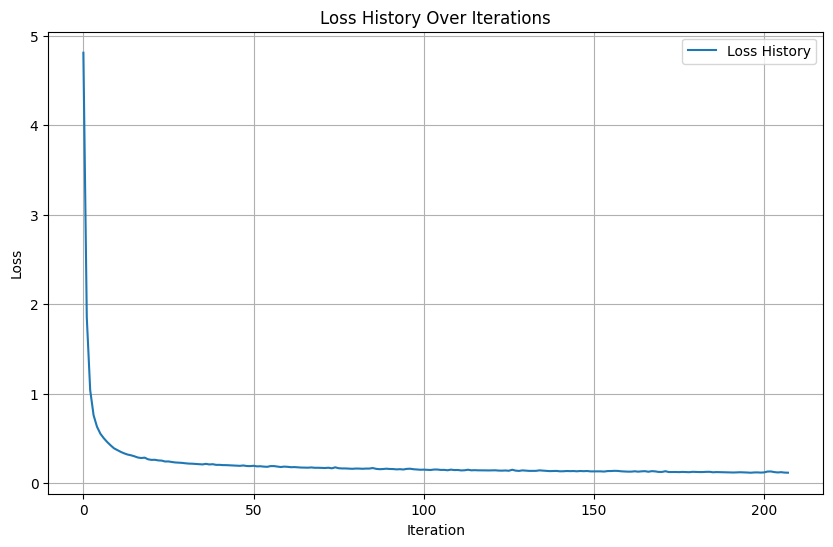

Train MSE: 0.23697118292619698, Train R2: 0.9736772875928819


In [34]:
mlpRegressor.train()
mlpRegressor.show_MSE_R2(X_train_pIC50, y_train_pIC50)

<h3 style="font-family: Arial;">Testing</h3>

In [35]:
y_test_pred_pIC50 = mlpRegressor.predict(X_test_pIC50)
pred_values_pIC50['MLPRegressor'] = y_test_pred_pIC50
mlpRegressor.show_MSE_R2(X_test_pIC50, y_test_pIC50, type_='Test')
print(f"y_pred = {y_test_pred_pIC50}")
print(f"y_real = {y_test_pIC50.to_numpy()}")

Test MSE: 0.5476860721014059, Test R2: 0.9405875392006013
y_pred = [0.19312381 0.37884895 0.47792238 ... 0.05223866 0.10211292 0.2390442 ]
y_real = [0.22 0.09 0.01 ... 0.01 0.27 0.27]


<h3 style="font-family: Arial;">Missing pIC50 tragets prédiction</h3>

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
<br/><br/>
<h1 style="font-family: Arial;">SUPPORT VECTOR MACHINE FOR REGRESSION : SVR</h1>

<h3 style="font-family: Arial;">Preparation of data for training, testing, validation and prediction</h3>

In [36]:
# at this step, the calling below generates rows that have missing target values. They will be used after training to predict the missing target values
process.prepare_missing_for_predict()

# logP training, testing and validation data
X_train_logP, X_test_logP, X_val_logP, y_train_logP, y_test_logP, y_val_logP = process.get_logP_splited_data_copy()
X_missing_logP = process.X_missing_logP

# pIC50 training, testing and validation data
X_train_pIC50, X_test_pIC50, X_val_pIC50, y_train_pIC50, y_test_pIC50, y_val_pIC50 = process.get_pIC50_splited_data_copy()
X_missing_pIC50 = process.X_missing_pIC50

<h2 style="font-family: Arial;">- logP</h2>
<h3 style="font-family: Arial;">Model instanciation and regularization parameters generation</h3>

In [37]:
svRegressor = ProjectSVRegressor(X_train_logP, X_test_logP, X_val_logP, y_train_logP, y_test_logP, y_val_logP, gammas = [0.1])
svRegressor.find_optimal_reg_parameter()

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[CV] END .......................C=1.0, gamma=0.1, kernel=rbf; total time=  34.6s
[CV] END .......................C=1.0, gamma=0.1, kernel=rbf; total time=  34.8s
[CV] END .......................C=1.0, gamma=0.1, kernel=rbf; total time=  35.0s
[CV] END .......................C=1.0, gamma=0.1, kernel=rbf; total time=  35.5s
[CV] END .......................C=1.0, gamma=0.1, kernel=rbf; total time=  37.2s
[CV] END ....................C=1.0, gamma=0.1, kernel=linear; total time=  49.8s
[CV] END ....................C=1.0, gamma=0.1, kernel=linear; total time=  50.2s
[CV] END ....................C=1.0, gamma=0.1, kernel=linear; total time=  50.7s
[CV] END ....................C=1.0, gamma=0.1, kernel=linear; total time=  52.0s
[CV] END ....................C=1.0, gamma=0.1, kernel=linear; total time=  52.6s

Best parameters found: {'C': 1.0, 'gamma': 0.1, 'kernel': 'rbf'}


<h3 style="font-family: Arial;">Training</h3>

In [38]:
svRegressor.train()
svRegressor.show_MSE_R2(X_train_logP, y_train_logP)


> Launch : SVR Regessor -> best parameters = {'C': 1.0, 'gamma': 0.1, 'kernel': 'rbf'}

No loss history to plot. Train the model first.
Train MSE: 0.19435287994994913, Train R2: 0.9236654692494044


<h3 style="font-family: Arial;">Testing</h3>

In [39]:
y_test_pred_logP = svRegressor.predict(X_test_logP)
pred_values_logP['SVR'] = y_test_pred_logP
svRegressor.show_MSE_R2(X_test_logP, y_test_logP, type_='Test')
print(f"y_pred = {y_test_pred_logP}")
print(f"y_real = {y_test_logP.to_numpy()}")

Test MSE: 0.29294038027198177, Test R2: 0.8899102285736734
y_pred = [4.05254192 1.17871936 3.68747746 ... 2.39602529 1.58094741 7.17429749]
y_real = [4.2719 0.4354 6.1615 ... 2.5072 1.9426 7.274 ]


<h3 style="font-family: Arial;">Missing logP tragets prédiction</h3>

In [40]:
svRegressor.predict(X_missing_logP)

It has no missing value to predict here. shape of X = (0, 0)


<h2 style="font-family: Arial;">- pIC50</h2>
<h3 style="font-family: Arial;">Model instanciation and regularization parameters generation</h3>

In [41]:
svRegressor = ProjectSVRegressor(X_train_pIC50, X_test_pIC50, X_val_pIC50, y_train_pIC50, y_test_pIC50, y_val_pIC50, gammas = [0.1])
svRegressor.find_optimal_reg_parameter()

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV] END .......................C=1.0, gamma=0.1, kernel=rbf; total time=   8.0s
[CV] END .......................C=1.0, gamma=0.1, kernel=rbf; total time=  10.5s
[CV] END .......................C=1.0, gamma=0.1, kernel=rbf; total time=  10.8s
[CV] END .......................C=1.0, gamma=0.1, kernel=rbf; total time=  10.9s
[CV] END .......................C=1.0, gamma=0.1, kernel=rbf; total time=  10.2s
[CV] END ....................C=1.0, gamma=0.1, kernel=linear; total time=  12.7s
[CV] END ....................C=1.0, gamma=0.1, kernel=linear; total time=  14.0s
[CV] END ....................C=1.0, gamma=0.1, kernel=linear; total time=  14.0s
[CV] END ....................C=1.0, gamma=0.1, kernel=linear; total time=  14.3s
[CV] END ....................C=1.0, gamma=0.1, kernel=linear; total time=  15.0s

Best parameters found: {'C': 1.0, 'gamma': 0.1, 'kernel': 'rbf'}


<h3 style="font-family: Arial;">Training</h3>

In [42]:
svRegressor.train()
svRegressor.show_MSE_R2(X_train_pIC50, y_train_pIC50)


> Launch : SVR Regessor -> best parameters = {'C': 1.0, 'gamma': 0.1, 'kernel': 'rbf'}

No loss history to plot. Train the model first.
Train MSE: 0.7144029921397532, Train R2: 0.9206442560961682


<h3 style="font-family: Arial;">Testing</h3>

In [43]:
y_test_pred_pIC50 = svRegressor.predict(X_test_pIC50)
pred_values_pIC50['SVR'] = y_test_pred_pIC50
svRegressor.show_MSE_R2(X_test_pIC50, y_test_pIC50, type_='Test')
print(f"y_pred = {y_test_pred_pIC50}")
print(f"y_real = {y_test_pIC50.to_numpy()}")

Test MSE: 1.0071574896659214, Test R2: 0.8907445196771077
y_pred = [ 0.18574483  0.17358765  1.26324708 ... -0.01809317  0.10833467
  0.23727917]
y_real = [0.22 0.09 0.01 ... 0.01 0.27 0.27]


<h3 style="font-family: Arial;">Missing pIC50 tragets prédiction</h3>

In [44]:
svRegressor.predict(X_missing_pIC50)

array([0.13573454, 0.47975246, 1.19822413, ..., 0.45296867, 0.2807771 ,
       3.4804297 ])

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
<br/><br/>
<h1 style="font-family: Arial;">3 - RANDOM FOREST REGRESSOR: RFR</h1>

<h3 style="font-family: Arial;">Preparation of data for training, testing, validation and prediction</h3>

In [45]:
# at this step, the calling below generates rows that have missing target values. They will be used after training to predict the missing target values
process.prepare_missing_for_predict()

# logP training, testing and validation data
X_train_logP, X_test_logP, X_val_logP, y_train_logP, y_test_logP, y_val_logP = process.get_logP_splited_data_copy()
X_missing_logP = process.X_missing_logP

# pIC50 training, testing and validation data
X_train_pIC50, X_test_pIC50, X_val_pIC50, y_train_pIC50, y_test_pIC50, y_val_pIC50 = process.get_pIC50_splited_data_copy()
X_missing_pIC50 = process.X_missing_pIC50

<h2 style="font-family: Arial;">- logP</h2>
<h3 style="font-family: Arial;">Model instanciation and regularization parameters generation</h3>

In [46]:
rftRegressor = ProjectRFRegressor(X_train_logP, X_test_logP, X_val_logP, y_train_logP, y_test_logP, y_val_logP)
rftRegressor.find_optimal_parameter()

Optimal parameters : {'n_estimators': 76, 'min_samples_split': 12, 'min_samples_leaf': 4, 'max_depth': 47}


<h3 style="font-family: Arial;">Training</h3>


> Launch : RF Regessor -> best parameters = {'n_estimators': 76, 'min_samples_split': 12, 'min_samples_leaf': 4, 'max_depth': 47}



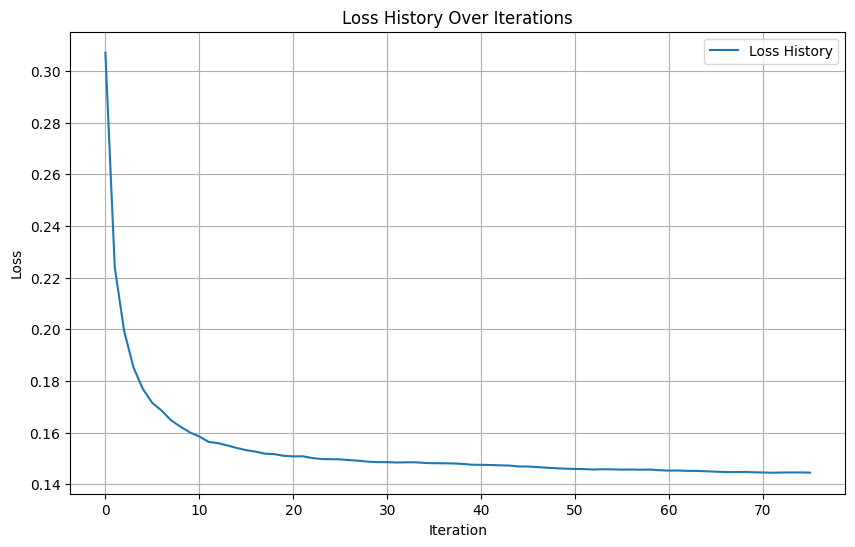

In [47]:
rftRegressor.train()

<h3 style="font-family: Arial;">Testing</h3>

In [48]:
y_test_pred_pIC50 = rftRegressor.predict(X_test_logP)
pred_values_logP['Random Forest Regressor'] = y_test_pred_logP
rftRegressor.show_MSE_R2(X_test_logP, y_test_logP, type_='Test')
print(f"y_pred = {y_test_pred_logP}")
print(f"y_real = {y_test_logP.to_numpy()}")

Test MSE: 0.3317839709541214, Test R2: 0.8753124390316368
y_pred = [4.05254192 1.17871936 3.68747746 ... 2.39602529 1.58094741 7.17429749]
y_real = [4.2719 0.4354 6.1615 ... 2.5072 1.9426 7.274 ]


<h3 style="font-family: Arial;">Missing logP tragets prédiction</h3>

In [49]:
rftRegressor.predict(X_missing_logP)

It has no missing value to predict here. shape of X = (0, 0)


<h2 style="font-family: Arial;">- pIC50</h2>
<h3 style="font-family: Arial;">Model instanciation and regularization parameters generation</h3>

In [50]:
rftRegressor = ProjectRFRegressor(X_train_pIC50, X_test_pIC50, X_val_pIC50, y_train_pIC50, y_test_pIC50, y_val_pIC50)
rftRegressor.find_optimal_parameter()

Optimal parameters : {'n_estimators': 19, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 10}


<h3 style="font-family: Arial;">Training</h3>


> Launch : RF Regessor -> best parameters = {'n_estimators': 19, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 10}



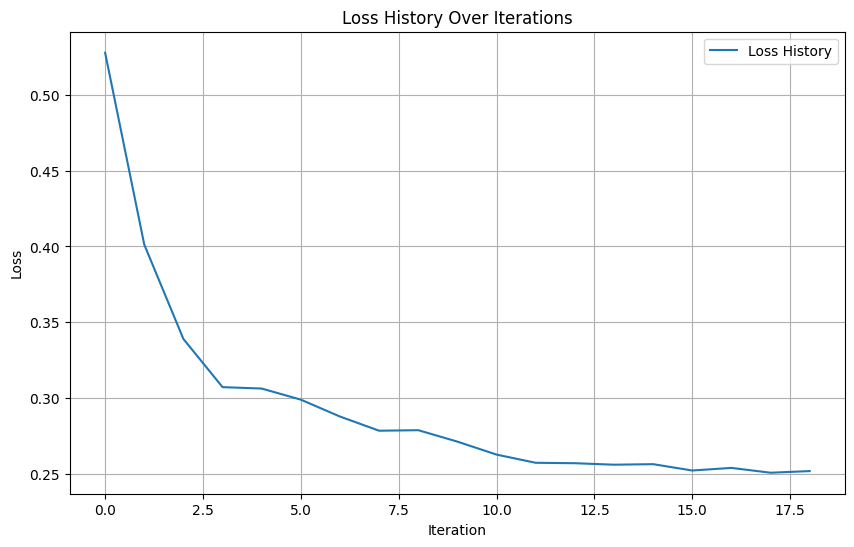

In [51]:
rftRegressor.train()

<h3 style="font-family: Arial;">Testing</h3>

In [52]:
y_test_pred_pIC50 = rftRegressor.predict(X_test_pIC50)
pred_values_pIC50['Random Forest Regressor'] = y_test_pred_pIC50
rftRegressor.show_MSE_R2(X_test_pIC50, y_test_pIC50, type_='Test')
print(f"y_pred = {y_test_pred_pIC50}")
print(f"y_real = {y_test_pIC50.to_numpy()}")

Test MSE: 0.6917557211520956, Test R2: 0.9249590015900586
y_pred = [0.09940526 0.15319388 0.09535745 ... 0.0412486  0.18148208 0.16851203]
y_real = [0.22 0.09 0.01 ... 0.01 0.27 0.27]


<h3 style="font-family: Arial;">Missing pIC50 tragets prédiction</h3>

In [53]:
rftRegressor.predict(X_missing_pIC50)

array([1.02667419, 0.4968991 , 0.53421816, ..., 0.33946655, 0.01963793,
       5.93330747])

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

<br/><br/>
<h1 style="font-family: Arial;">4 - GRADIENT BOOSTING FOR REGRESSION : GBR</h1>

<h3 style="font-family: Arial;">Preparation of data for training, testing, validation and prediction</h3>

In [54]:
# at this step, the calling below generates rows that have missing target values. They will be used after training to predict the missing target values
process.prepare_missing_for_predict()

# logP training, testing and validation data
X_train_logP, X_test_logP, X_val_logP, y_train_logP, y_test_logP, y_val_logP = process.get_logP_splited_data_copy()
X_missing_logP = process.X_missing_logP

# pIC50 training, testing and validation data
X_train_pIC50, X_test_pIC50, X_val_pIC50, y_train_pIC50, y_test_pIC50, y_val_pIC50 = process.get_pIC50_splited_data_copy()
X_missing_pIC50 = process.X_missing_pIC50

<h2 style="font-family: Arial;">- logP</h2>
<h3 style="font-family: Arial;">Model instanciation and regularization parameters generation</h3>

In [55]:
gbRegressor = ProjectGBRegressor(X_train_logP, X_test_logP, X_val_logP, y_train_logP, y_test_logP, y_val_logP)
gbRegressor.find_optimal_parameter()

Optimal parameters: {'subsample': 0.6, 'n_estimators': 20, 'max_depth': 10, 'learning_rate': 0.1}


<h3 style="font-family: Arial;">Training</h3>


> Launch : GB Regessor -> best parameters = {'subsample': 0.6, 'n_estimators': 20, 'max_depth': 10, 'learning_rate': 0.1}



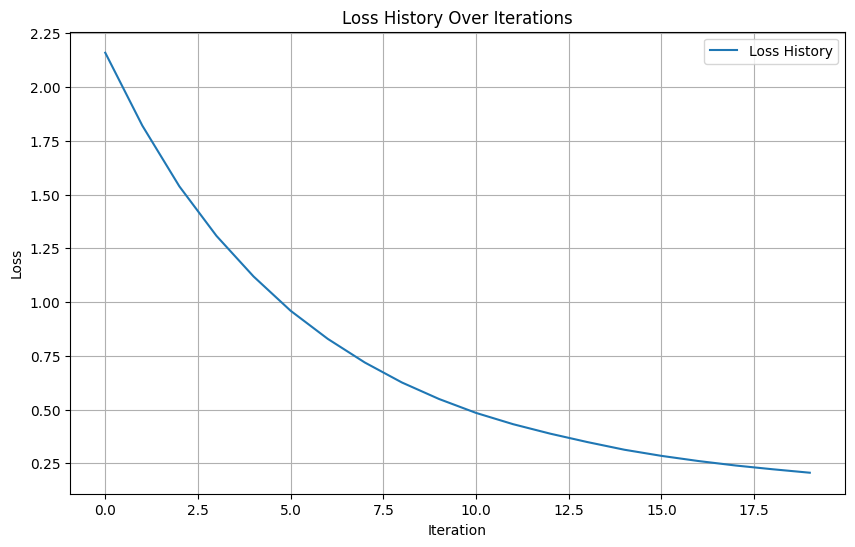

Train MSE: 0.205298410844301, Train R2: 0.9193664747356536


In [56]:
gbRegressor.train()
gbRegressor.show_MSE_R2(X_train_logP, y_train_logP)

<h3 style="font-family: Arial;">Testing</h3>

In [57]:
y_test_pred_logP = gbRegressor.predict(X_test_logP)
pred_values_logP['Gradient Boosting Regressor'] = y_test_pred_logP
gbRegressor.show_MSE_R2(X_test_logP, y_test_logP, type_='Test')
print(f"y_pred = {y_test_pred_logP}")
print(f"y_real = {y_test_logP.to_numpy()}")

Test MSE: 0.36268508783334213, Test R2: 0.8636995064243496
y_pred = [3.74827044 0.89428842 3.73496661 ... 2.22077723 1.67471535 6.66509389]
y_real = [4.2719 0.4354 6.1615 ... 2.5072 1.9426 7.274 ]


<h3 style="font-family: Arial;">Missing logP tragets prédiction</h3>

In [58]:
gbRegressor.predict(X_missing_logP)

It has no missing value to predict here. shape of X = (0, 0)


<h2 style="font-family: Arial;">- pIC50</h2>
<h3 style="font-family: Arial;">Model instanciation and regularization parameters generation</h3>

In [59]:
gbRegressor = ProjectGBRegressor(X_train_pIC50, X_test_logP, X_val_pIC50, y_train_pIC50, y_test_pIC50, y_val_pIC50)
gbRegressor.find_optimal_parameter()

Optimal parameters: {'subsample': 0.5, 'n_estimators': 20, 'max_depth': 15, 'learning_rate': 0.1}


<h3 style="font-family: Arial;">Training</h3>


> Launch : GB Regessor -> best parameters = {'subsample': 0.5, 'n_estimators': 20, 'max_depth': 15, 'learning_rate': 0.1}



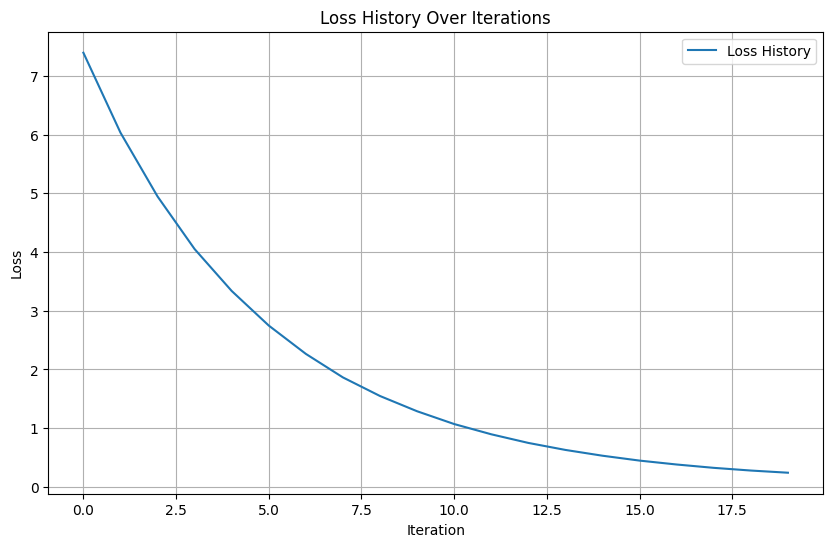

Train MSE: 0.2372361493817921, Train R2: 0.973647855171091


In [60]:
gbRegressor.train()
gbRegressor.show_MSE_R2(X_train_pIC50, y_train_pIC50)

<h3 style="font-family: Arial;">Testing</h3>

In [61]:
y_test_pred_pIC50 = gbRegressor.predict(X_test_pIC50)
pred_values_pIC50['Gradient Boosting Regressor'] = y_test_pIC50
gbRegressor.show_MSE_R2(X_test_pIC50, y_test_pIC50, type_='Test')
print(f"y_pred = {y_test_pred_pIC50}")
print(f"y_real = {y_test_logP.to_numpy()}")

Test MSE: 0.7339455054660147, Test R2: 0.9203822941761413
y_pred = [-0.00472429  0.44858873  0.29831447 ...  0.21741005  0.41979156
  0.39589598]
y_real = [4.2719 0.4354 6.1615 ... 2.5072 1.9426 7.274 ]


<h3 style="font-family: Arial;">Missing pIC50 tragets prédiction</h3>

In [62]:
gbRegressor.predict(X_missing_pIC50)

array([1.12419306, 0.83734221, 0.77877893, ..., 0.38282986, 0.19210608,
       4.48043643])

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
<h1 style="font-family: Arial; text-align: center;">STEP 3: VISUALISATION OF PREDICT DATA AND COMPARATION OF MODELS</h1>

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


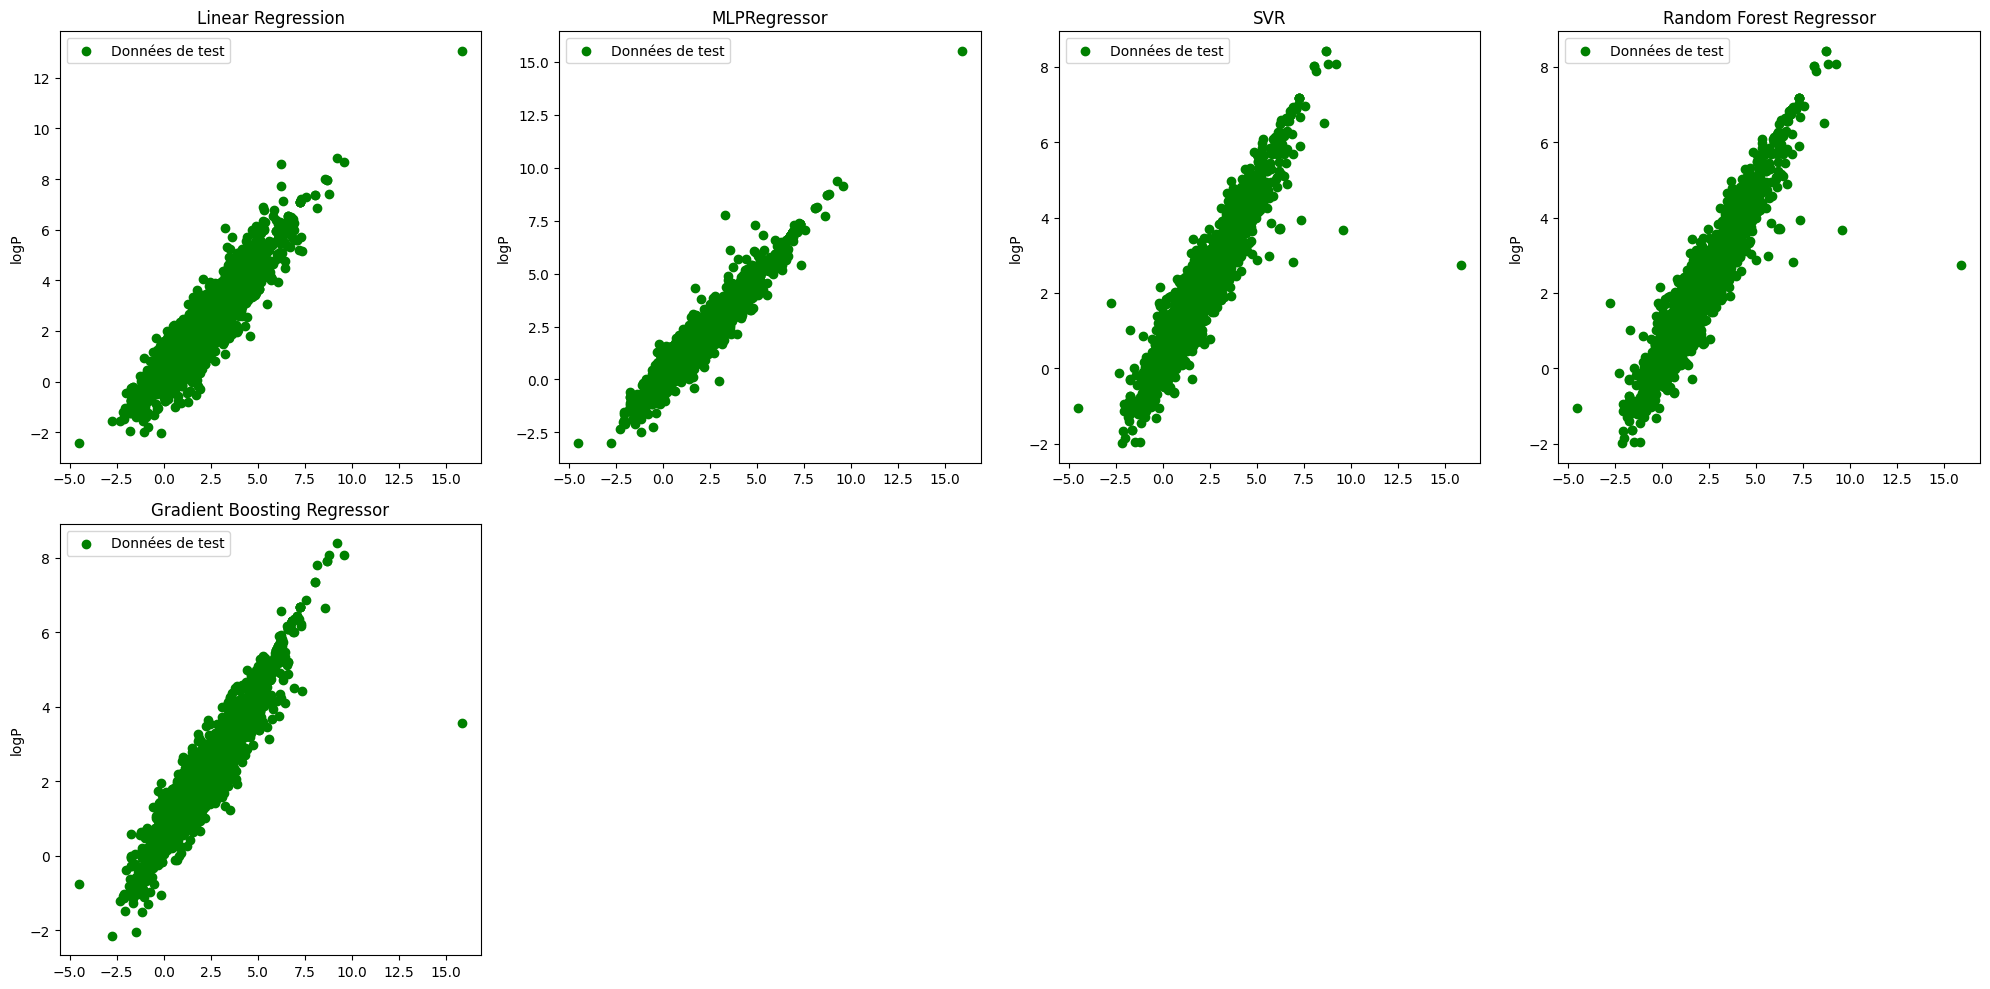

In [63]:
plt.figure(figsize=(20,10))
for i,preds in enumerate(pred_values_logP):
    plt.subplot(2, 4, i+1)
    plt.scatter(y_test_logP , pred_values_logP[preds], color='green', label='Données de test')
    #plt.scatter(np.arange(len(pred_values_logP[preds])),pred_values_logP[preds] ,color='blue', label='Prédictions sur les données de test')
    plt.ylabel('logP')
    plt.legend()
    plt.title(preds)
plt.tight_layout()
plt.show()

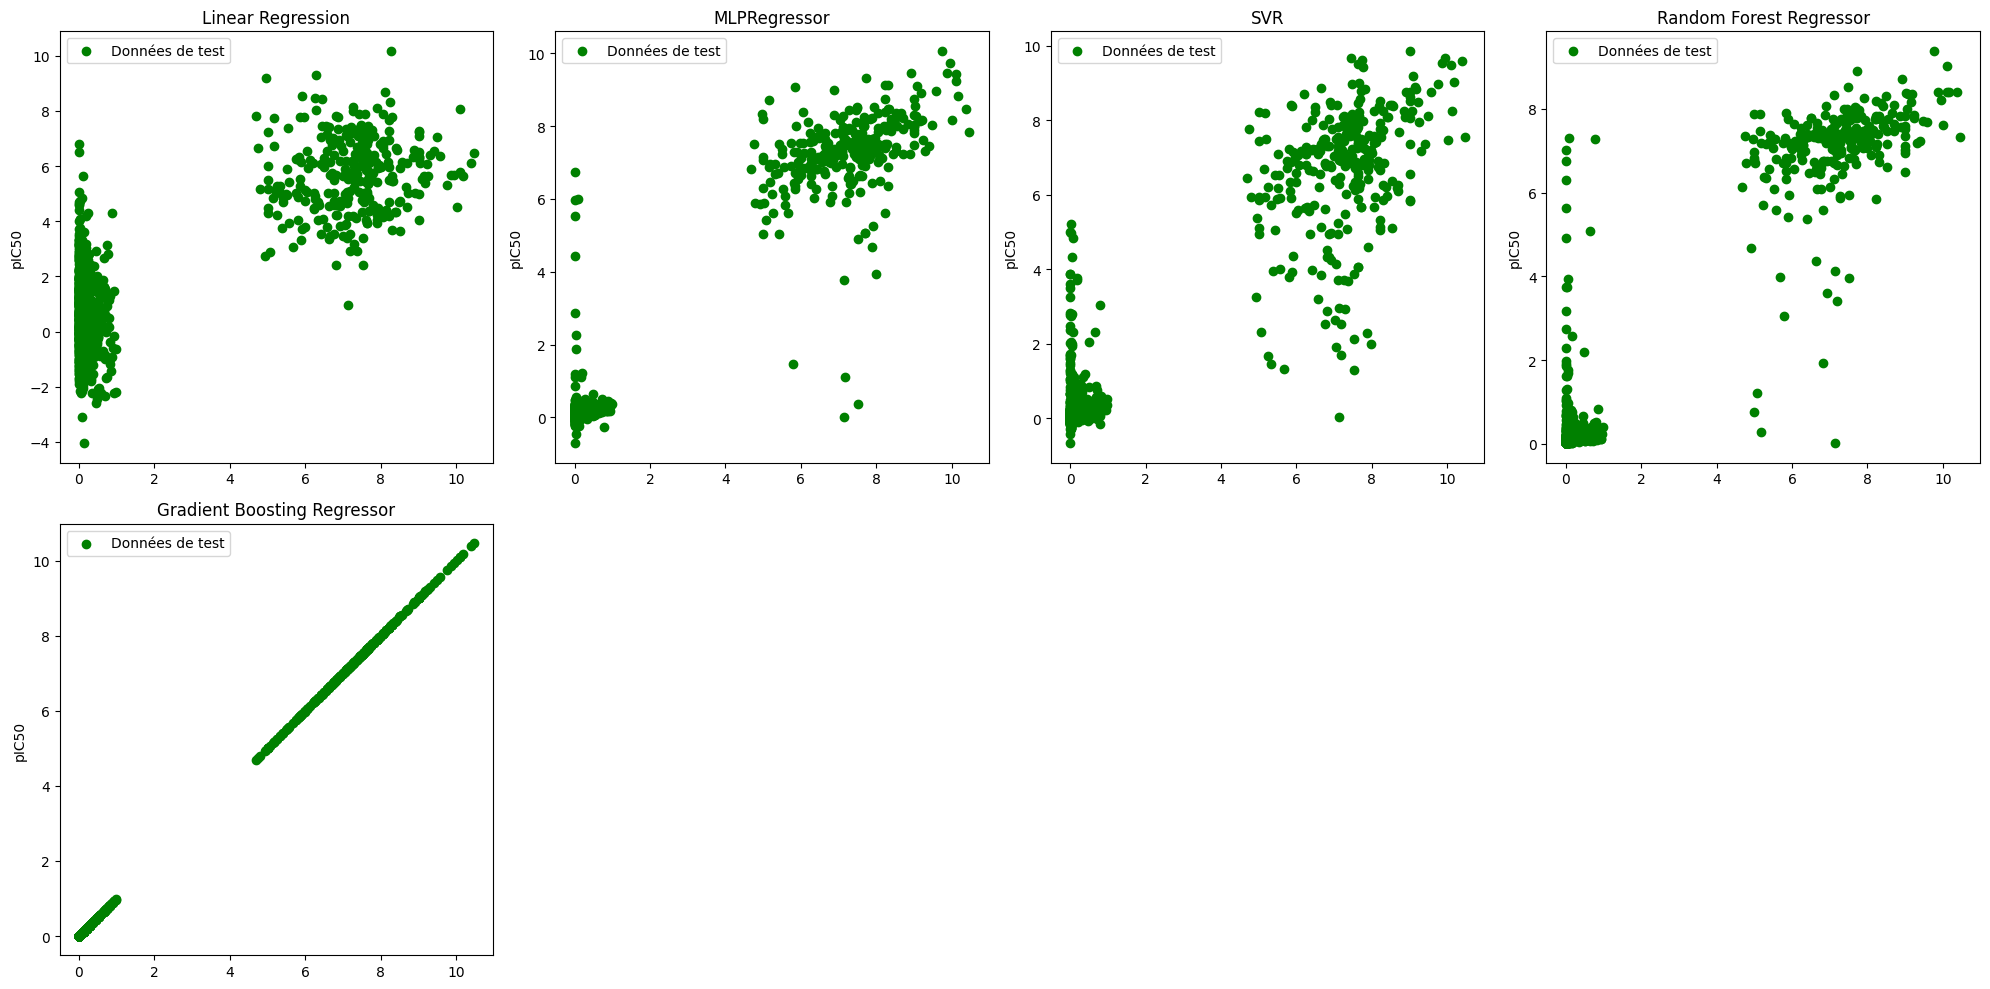

In [66]:
plt.figure(figsize=(20,10))
for i,preds in enumerate(pred_values_pIC50):
    plt.subplot(2, 4, i+1)
    plt.scatter(y_test_pIC50, pred_values_pIC50[preds] ,color='green', label='Données de test')
    #plt.scatter(np.arange(len(pred_values_pIC50[preds])),pred_values_pIC50[preds] ,color='blue', label='Prédictions sur les données de test')
    plt.ylabel('pIC50')
    plt.legend()
    plt.title(preds)
plt.tight_layout()
plt.show()